# Energy consumption prediction

In [1]:
# importing required pacakges
import pandas as pd 
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
data=pd.read_csv("Energy consumption.csv")

In [3]:
# first five rows of the dataset
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


#### This dataset captures detailed information about energy consumption across various buildings. It includes 7 key columns that help analyze the influence of different factors on energy usage:
1) Building Type: Categorical variable indicating the nature of the building (e.g., residential, commercial, industrial)
2) Square Footage: Total floor area of the building in square feet.
3) Number of Occupants: Number of individuals typically occupying the building.
4) Appliances Used: Count of major appliances contributing to energy usage.
5) Average Temperature: The average ambient temperature °C  during the recorded period.
6) Day of Week: Indicates the specific day energy usage was recorded, potentially revealing weekly usage patterns.
7) Energy Consumption: Target variable representing the total energy used.

In [4]:
# total records and features in dataset 
print("Total records in dataset:",data.shape[0])
print("Total featuers in dataset:",data.shape[1])

Total records in dataset: 1100
Total featuers in dataset: 7


In [5]:
# information of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


In [6]:
# checking null values
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

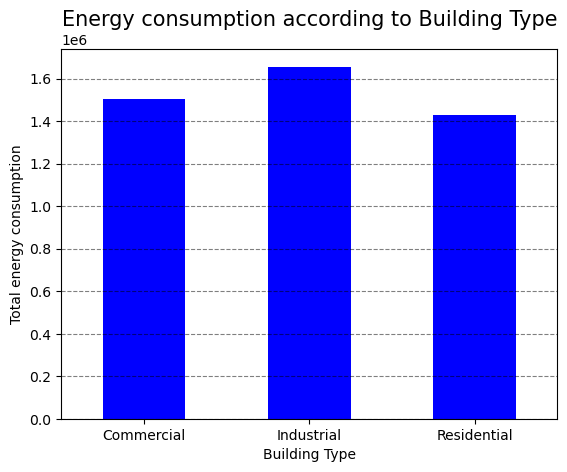

In [7]:
# Plotting total energy consumption for each building type to visualize which types consume the most energy
data.groupby("Building Type")["Energy Consumption"].sum().plot(kind="bar",color="blue")
plt.title("Energy consumption according to Building Type",fontsize=15)
plt.xlabel("Building Type",fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Total energy consumption",fontsize=10)
plt.grid(axis="y",alpha=0.5,color="black",linestyle="dashed")
plt.show()

## Key Observations

1) Industrial buildings have the highest total energy consumption, slightly exceeding 1.65 million units.
2) Commercial buildings consume slightly less energy than industrial ones, with a total close to 1.5 million units.
3) Residential buildings show the lowest total energy consumption, approximately 1.45 million units.
4) The difference between the highest (Industrial) and lowest (Residential) energy consumers is noticeable, but not extreme—suggesting relatively high energy use across all building types.
5) All building types fall within the 1.4 to 1.7 million energy consumption range, indicating heavy energy usage regardless of the type, possibly due to large square footage or appliance density.

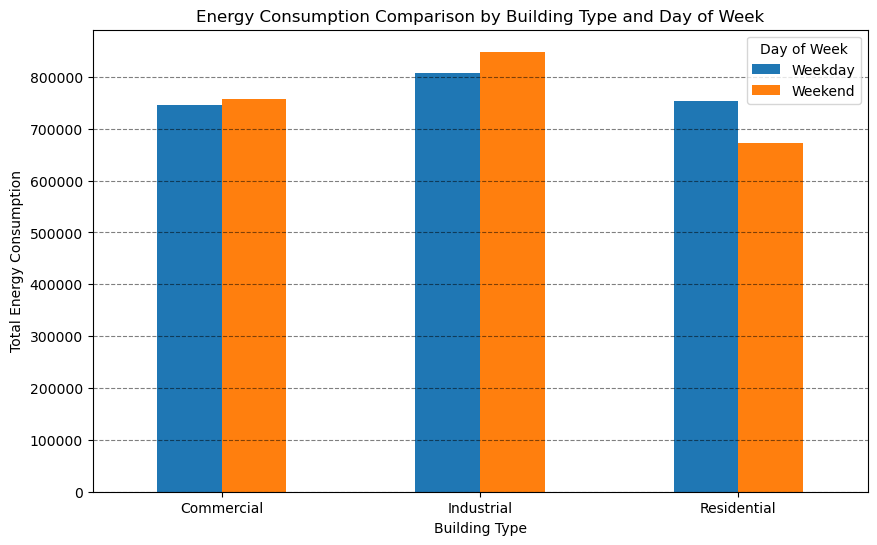

In [9]:
# Visualizing total energy consumption across different building types and days of the week to identify usage patterns
data.groupby(["Building Type","Day of Week"])["Energy Consumption"].sum().unstack().plot(kind="bar", figsize=(10, 6))
plt.xlabel("Building Type")
plt.ylabel("Total Energy Consumption")
plt.title("Energy Consumption Comparison by Building Type and Day of Week")
plt.legend(title="Day of Week")
plt.xticks(rotation=0) 
plt.grid(axis="y",alpha=0.5,color="black",linestyle="dashed")
plt.show()

## Key Observations
1) Industrial buildings consume the most energy, especially on weekends.
2) Residential buildings have significantly lower energy consumption on weekends, possibly due to people spending more time outside.
3) Commercial buildings maintain a relatively consistent energy consumption pattern.

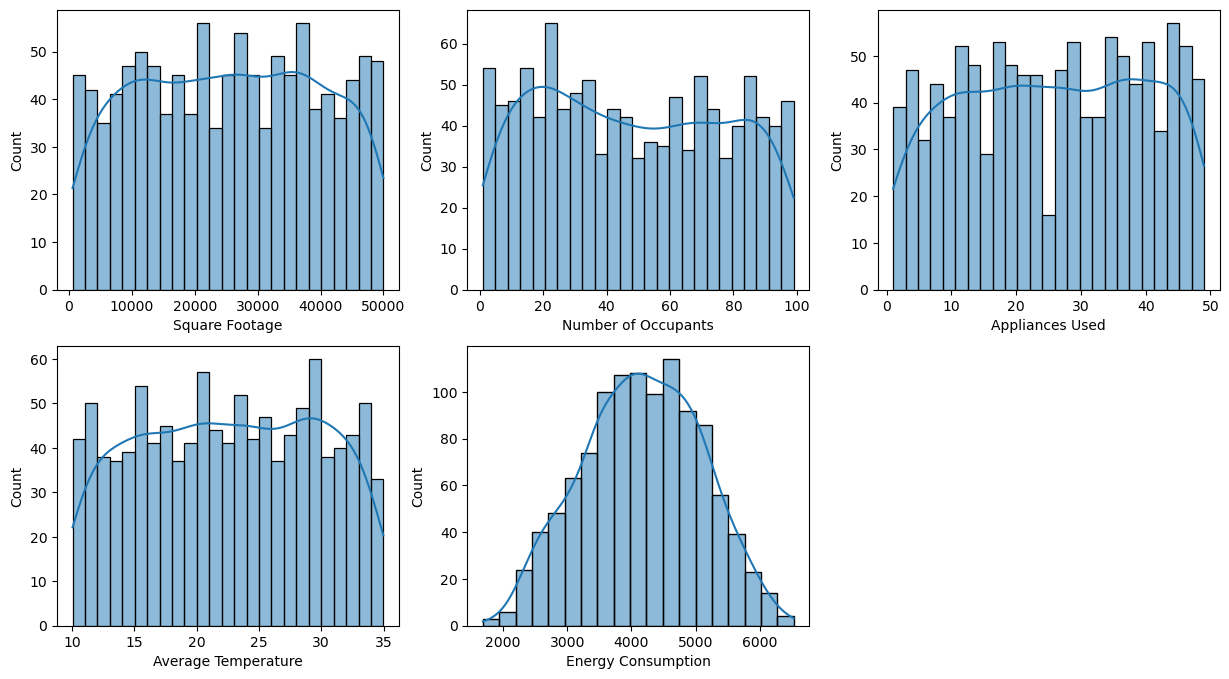

In [10]:
# dataset distribution for continuous features
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(data["Square Footage"],kde=True,bins=25)
plt.subplot(2,3,2)
sns.histplot(data["Number of Occupants"],kde=True,bins=25)
plt.subplot(2,3,3)
sns.histplot(data["Appliances Used"],kde=True,bins=25)
plt.subplot(2,3,4)
sns.histplot(data["Average Temperature"],kde=True,bins=25)
plt.subplot(2,3,5)
sns.histplot(data["Energy Consumption"],kde=True)
plt.show()

## Key Observations

1) The energy consumption variable has a normal distribution, which is ideal for predictive modeling.

2) Other features like square footage, number of occupants, appliances used, and temperature are more uniformly distributed, suggesting diverse data points across the dataset.


In [11]:
# encoding categorical data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data[data.select_dtypes(include=["object"]).columns]=data[data.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [12]:
# checking first five rows after encoding
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17


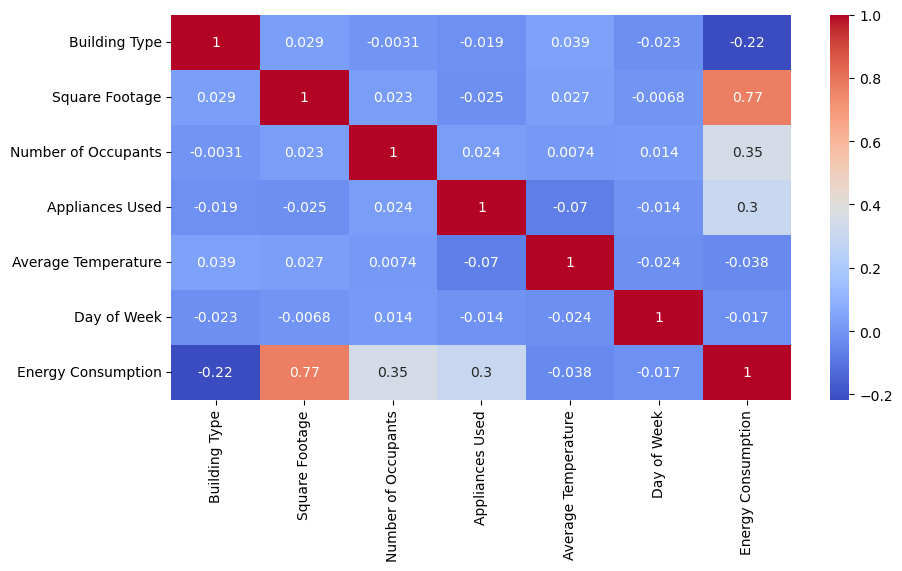

In [13]:
# plotting heatmap to Visualizing corelation between features
corr=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [14]:
# checking skewness in data
data.skew().sort_values()

Energy Consumption    -0.060156
Appliances Used       -0.047299
Building Type         -0.042242
Average Temperature   -0.035257
Square Footage        -0.009364
Day of Week            0.003641
Number of Occupants    0.095382
dtype: float64

In [15]:
# splitting data into input variables and target variables
x=data.iloc[:,:6]
y=data.iloc[:,6:7]

In [17]:
# splitting the data for train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [19]:
# standardizing data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(train_x)

scale_train_x=scale.transform(train_x)
scale_test_x=scale.transform(test_x)

In [20]:
# importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR

In [21]:
# importing evaluating metrics for regression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

In [22]:
# making function Adjusted r2 score
def adjusted_r2(data,actual,predicted): 
    n=data.shape[0]
    k=data.shape[1]
    r2=r2_score(actual,predicted)

    return 1-(1-r2)*(n-1)/(n-k-1)

In [23]:
# making function of the metrics 
def get_metrics(data,actual,predicted): 
    r2=r2_score(actual,predicted)
    adjusted_r2_score=adjusted_r2(data,actual,predicted)
    mse=mean_squared_error(actual,predicted)
    mae=mean_absolute_error(actual,predicted)
    rmse=root_mean_squared_error(actual,predicted)
    return r2,adjusted_r2_score,mse,mae,rmse

In [24]:
# Define a dictionary of various regression models 
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(), 
    "Lasso Regression":Lasso(), 
    "Decision Tree Regressor":DecisionTreeRegressor(), 
    "Random Forest Regressor":RandomForestRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor(),
    "Gradient Boosting Regressor":GradientBoostingRegressor(),
    "XGB Regressor":XGBRegressor(), 
    "KNeighbors Regressor":KNeighborsRegressor(),
    "support vector machine":SVR()
}

# Iterate through each model to train and evaluate
for i in range(len(list(models))): 
    model=list(models.values())[i]
    model.fit(scale_train_x,train_y)
    
    # Generate predictions for both training and test data
    train_pred=model.predict(scale_train_x)
    test_pred=model.predict(scale_test_x)
    
    # Evaluate training predictions using custom metrics function
    r2_train,adjusted_r2_train,mse_train,mae_train,rmse_train=get_metrics(scale_train_x,train_y,train_pred)
    # Evaluate test predictions using custom metrics function
    r2_test,adjusted_r2_test,mse_test,mae_test,rmse_test=get_metrics(scale_test_x,test_y,test_pred)
    
    # Print the model name and performance metrics
    print(list(models.keys())[i])
    print("************************")
    print("R2 score :",r2_train)
    print("adjusted r2 score :",adjusted_r2_train)
    print("Mean squared error :",mse_train)
    print("mean absolute error :",mae_train)
    print("roor mean squared error :",rmse_train)
    print("---------------------------------------------------------------")
    print("R2 score :",r2_test)
    print("adjusted r2 score :",adjusted_r2_test)
    print("Mean squared error :",mse_test)
    print("mean absolute error :",mae_test)
    print("roor mean squared error :",rmse_test)
    print("===============================================================")
    print("\n")
    

Linear Regression
************************
R2 score : 0.8581717431245918
adjusted r2 score : 0.8571969784725271
Mean squared error : 121689.08747345705
mean absolute error : 324.5043809318491
roor mean squared error : 348.8396300213854
---------------------------------------------------------------
R2 score : 0.8517757249945398
adjusted r2 score : 0.8476003933042451
Mean squared error : 123846.71901055466
mean absolute error : 327.73760215978
roor mean squared error : 351.91862555220723


Ridge Regression
************************
R2 score : 0.8581706404500438
adjusted r2 score : 0.8571958682194598
Mean squared error : 121690.03357166401
mean absolute error : 324.52673592629725
roor mean squared error : 348.840986083436
---------------------------------------------------------------
R2 score : 0.8517495913020181
adjusted r2 score : 0.8475735234513707
Mean squared error : 123868.55465167566
mean absolute error : 327.78767319444904
roor mean squared error : 351.94964789252975


Lasso Regr

## Key Observations:
1) Among all the models, Random Forest, Gradient Boosting, and XGBoost consistently show the highest accuracy. These ensemble models outperform others in capturing complex patterns in the data.
2) Based on their performance,select these three models for hyperparameter tuning and fine-tuning to further improve their accuracy and generalization. 

In [26]:
# making function of the metrics 
def metrics(data,actual,predicted): 
    print("R2 score:",r2_score(actual,predicted))
    print("Adjusted r2 score:",adjusted_r2(data,actual,predicted))
    print("Mean squared error:",mean_squared_error(actual,predicted))
    print("Mean absolute error:",mean_absolute_error(actual,predicted))
    print("Root mean squared error:",root_mean_squared_error(actual,predicted))    

## Hyperparameter tuning Random Forest Regressor

In [40]:
# importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Creating base model object for hyperparameter tuning
rf_tun=RandomForestRegressor()

# parameters for Random Forest Regressor
n_estimators_rf=[int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_depth_rf=[int(x) for x in np.linspace(start=10,stop=120,num=5)]
min_samples_split_rf=[2,5]
min_samples_leaf_rf=[1,2,4]
bootstrap_rf=[True,False]

# convert parameters lists into dictionary
param_rf=dict(n_estimators=n_estimators_rf,max_depth=max_depth_rf,min_samples_split=min_samples_split_rf,min_samples_leaf=min_samples_leaf_rf,bootstrap=bootstrap_rf)

#Initializing RandomizedSearchCV to tune hyperparameters of Random Forest
rv_rf=RandomizedSearchCV(estimator=rf_tun,param_distributions=param_rf,scoring="neg_mean_squared_error",n_jobs=-1,cv=4,verbose=2,n_iter=50)

# Fitting the RandomizedSearchCV on the scaled training data
rv_rf.fit(scale_train_x,train_y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 37, 65, 92, 120],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Making predictions on the scaled test set
rv_rf_pred=rv_rf.predict(scale_test_x)

# Evaluating the model's performance using a custom 'metrics' function
metrics(scale_test_x,test_y,rv_rf_pred)

R2 score: 0.9811251754515598
Adjusted r2 score: 0.9805934902530121
Mean squared error: 15770.59555284101
Mean absolute error: 99.04139557272303
Root mean squared error: 125.58103181946312


## Hyperparameter tuning Gradient Boosting Regressor

In [29]:
# Creating base model object for hyperparameter tuning
gb_tun=GradientBoostingRegressor() 

# parameters for Gradient Boosting Regressor
loss_gb=['squared_error','absolute_error','huber','quantile']
learning_rate_gb=[0.001,0.01,0.1]
n_estimators_gb=[int(x) for x in np.linspace(start=1000,stop=1500,num=10)]
max_depth_gb=[int(x) for x in np.linspace(start=50,stop=80,num=2)]
min_samples_split_gb=[1,2,5]
min_samples_leaf_gb=[1,2,8]
max_features_gb=['sqrt', 'log2']
criterion_gb=['friedman_mse', 'squared_error']

# convert parameters lists into dictionary
param_gb=dict(loss=loss_gb,learning_rate=learning_rate_gb,n_estimators=n_estimators_gb,max_depth=max_depth_gb,min_samples_split=min_samples_split_gb,min_samples_leaf=min_samples_leaf_gb,max_features=max_features_gb,criterion=criterion_gb)

#Initializing RandomizedSearchCV to tune hyperparameters of Gradient Boosting 
rv_gb=RandomizedSearchCV(estimator=gb_tun,param_distributions=param_gb,scoring="neg_mean_squared_error",cv=4,n_jobs=-1,verbose=3,n_iter=20)

# Fitting the RandomizedSearchCV on the scaled training data
rv_gb.fit(scale_train_x,train_y)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [50, 80],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 8],
                                        'min_samples_split': [1, 2, 5],
                                        'n_estimators': [1000, 1055, 1111, 1166,
                                                         1222, 1277, 1333, 1388,
                                                         1444, 1500]},
                   scoring='neg_mean_squared_error', verbose=3)

In [30]:
# Making predictions on the scaled test set
rv_gb_pred=rv_gb.predict(scale_test_x)

# Evaluating the model's performance using a custom 'metrics' function
metrics(scale_test_x,test_y,rv_gb_pred)

R2 score: 0.9901661284642908
Adjusted r2 score: 0.9898891179984961
Mean squared error: 8216.55376505646
Mean absolute error: 70.91577774012691
Root mean squared error: 90.64520817482003


## Hyperparameter tuning XGB Regressor

In [129]:
# importing RandomizedSearchCV for Hyperparameter tuning
xgb_tun=XGBRegressor()

# parameters for xgboost regressor
n_estimators_xgb=[int(x) for x in np.linspace(start=1000,stop=1500,num=10)]
max_depth_xgb=[int(x) for x in np.linspace(start=2,stop=30,num=2)]
learning_rate_xgb=[0.01,0.02,0.04,0.05]
subsample_xgb=[0.5,0.3]
colsample_bytree_xgb=[0.5,0.3,0.4]
colsample_bylevel_xgb=[0.5,0.3,0.4]
min_child_weight_xgb=[int(x) for x in np.linspace(start=1,stop=100,num=10)]

# convert parameters lists into dictionary
param_xgb=dict(n_estimators=n_estimators_xgb,max_depth=max_depth_xgb,learning_rate=learning_rate_xgb,subsample=subsample_xgb,colsample_bytree=colsample_bytree_xgb,min_child_weight=min_child_weight_xgb)

#Initializing RandomizedSearchCV to tune hyperparameters of xgboost
rv_xgb=RandomizedSearchCV(estimator=xgb_tun,param_distributions=param_xgb,scoring="neg_mean_squared_error",cv=4,n_jobs=-1,verbose=3,n_iter=30)

# Fitting the RandomizedSearchCV on the scaled training data
rv_xgb.fit(scale_train_x,train_y)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.05],
                                        'max_depth': [2, 30],
                                        'min_child_weight': [1, 12, 23, 34, 45,
                                                             56, 67, 78, 89,
                                                             100],
                                        'n_estimators': [1000, 1055, 1111, 1166,
                                                         1222, 1277, 1333, 1388,
                                                         1444, 1500],
                                        'subsample': [0.5, 0.3]},
                   scoring='neg_mean_squared_error', verbose=3)

In [130]:
# Making predictions on the scaled test set
rv_xgb_pred=rv_xgb.predict(scale_test_x)

# Evaluating the model's performance using a custom 'metrics' function
metrics(scale_test_x,test_y,rv_xgb_pred)

R2 score: 0.9987371563911438
Adjusted r2 score: 0.9987015833317394
Mean squared error: 1055.162353515625
Mean absolute error: 25.426532745361328
Root mean squared error: 32.48326110839844



## Key Observations:
1) After hyperparameter tuning on the top-performing regression models—Random Forest, Gradient Boosting, and XGBoost— XGBoost delivers the highest accuracy on the test dataset.

2) The fine-tuned XGBoost model outperforms the others in terms of evaluation metrics such as R² score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), making it the most reliable choice for predicting energy consumption.

3) This indicates that XGBoost handles the complexity and non-linearity in the data more effectively, likely due to its built-in regularization, handling of missing values, and ability to prevent overfitting.Therefore, the final model selected for deployment or further analysis is the fine-tuned XGBoost Regressor.

In [131]:
# best parameter for xgboost regressor for tain final model
rv_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 1388,
 'min_child_weight': 23,
 'max_depth': 2,
 'learning_rate': 0.05,
 'colsample_bytree': 0.3}

# Final model 

In [132]:
#  Fitting the final model
final_model=XGBRegressor(subsample=0.5,n_estimators=1388,min_child_weight=23,max_depth=2,learning_rate=0.05,colsample_bytree=0.3)
final_model.fit(scale_train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=23, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1388,
             n_jobs=None, num_parallel_tree=None, ...)

In [133]:
# Making predictions on the scaled test set
final_test_pred=final_model.predict(scale_test_x)

# Evaluating the model's performance using a custom 'metrics' function 
metrics(scale_test_x,test_y,final_test_pred)

R2 score: 0.9987371563911438
Adjusted r2 score: 0.9987015833317394
Mean squared error: 1055.162353515625
Mean absolute error: 25.426532745361328
Root mean squared error: 32.48326110839844


In [134]:
# craeting dataframe of actual and predicted values for test
act_pred=pd.DataFrame()
act_pred["actual"]=test_y
act_pred["predicted"]=final_test_pred

In [135]:
act_pred.head()

,actual,predicted
704,4090.20,4085.092773
278,6383.50,6353.499512
423,5473.98,5414.615234
1054,3629.61,3604.310059
114,4901.86,4915.695801


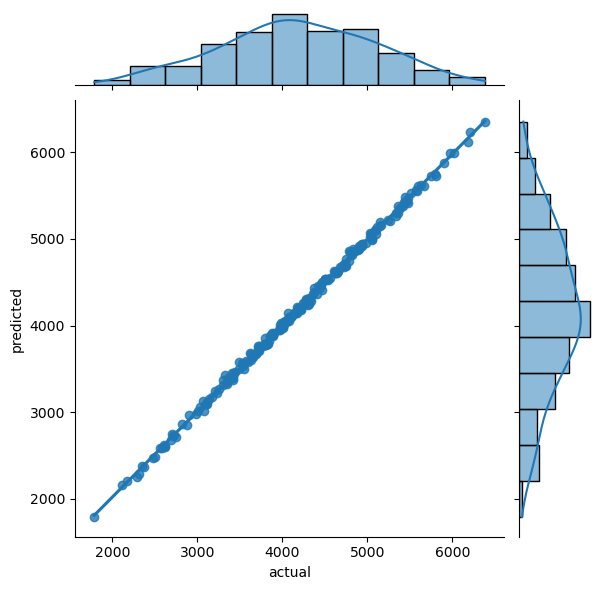

In [138]:
# Actual vs Predicted Values with Distribution – XGBoost Model
sns.jointplot(x="actual",y="predicted",data=act_pred,kind="reg")
plt.show()

## Key Observation:
1) The scatter plot shows that the predicted values align very closely with the actual values, forming a nearly perfect diagonal line.

2) This indicates a strong correlation and high accuracy of the model predictions.

3) The marginal histograms (top and right) show a normal distribution of actual and predicted values, suggesting that the model generalizes well across different value ranges.